**Coronavirus disease 2019(COVID-19) is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization.**

### Symtoms of Corona Virus:-
**Generally People are sick from Day 1 to Day 14 before develpoing symptoms.Common symtoms for corona virus is:-** 
* Fever
* Dry Cough
* Tiredness
* In severe condition tends to difficulty in breathing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_rows',20000, 'display.max_columns',100)

## INDIA CORONA CASES ANALYSIS

In [3]:
df_corona_in_india = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_corona_india = pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")
df_ICMR = pd.read_csv("../input/covid19-in-india/ICMRTestingLabs.csv")
df_Individual = pd.read_csv("../input/covid19-in-india/IndividualDetails.csv")
df_Hospital = pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")
df_Age = pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")
df_Italy = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_daily_US = pd.read_csv("../input/covid19-in-usa/us_states_covid19_daily.csv")
df_corona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2445,2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230
2446,2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469
2447,2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991
2448,2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192
2449,2450,29/05/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4332


In [4]:
df_corona_india.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
2315,2020-05-26,Telengana,0,0,1164,18.1124,79.0193,56,1920
2316,2020-05-26,Tripura,0,0,165,23.9408,91.9882,0,194
2317,2020-05-26,Uttar Pradesh,0,0,3581,26.8467,80.9462,165,6532
2318,2020-05-26,Uttarakhand,0,0,58,30.0668,79.0193,3,349
2319,2020-05-26,West Bengal,0,0,1414,22.9868,87.8550,278,3816


In [5]:
#Total cases of carona in India
df_corona_in_india['Total Cases'] = df_corona_in_india['Cured'] + df_corona_in_india['Deaths'] + df_corona_in_india['Confirmed']
#Active cases of carona in India
df_corona_in_india['Active Cases'] = df_corona_in_india['Total Cases'] - df_corona_in_india['Cured'] - df_corona_in_india['Deaths']
df_corona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
2445,2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230,395,230
2446,2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469,552,469
2447,2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991,11164,6991
2448,2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192,6059,4192
2449,2450,29/05/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4332,4332,4332


In [6]:
import matplotlib.pyplot as plt

In [9]:
#Till 8th April Cases in India
df1= df_corona_in_india[df_corona_in_india['Date']=='29/05/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(
    title='Till 29/05/20 Total Cases in India')
fig.show()

In [10]:
#Till 8th April Active Cases in India
df1= df_corona_in_india[df_corona_in_india['Date']=='29/05/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Active Cases', color='Active Cases',barmode='group', height=600)
fig.update_layout(
    title='Till 29/05/20 Active Cases in India')
fig.show()

In [11]:
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)
df_corona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
2445,2446,2020-05-29,8:00 AM,Tripura,-,-,165,0,230,395,230
2446,2447,2020-05-29,8:00 AM,Uttarakhand,-,-,79,4,469,552,469
2447,2448,2020-05-29,8:00 AM,Uttar Pradesh,-,-,3991,182,6991,11164,6991
2448,2449,2020-05-29,8:00 AM,West Bengal,-,-,1578,289,4192,6059,4192
2449,2450,2020-05-29,8:00 AM,Cases being reassigned to states,-,-,0,0,4332,4332,4332


In [12]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
corona_data.tail(10)

,Date,Total Cases
111,2020-05-20,152351
112,2020-05-21,161094
113,2020-05-22,170564
114,2020-05-23,180605
115,2020-05-24,190176
116,2020-05-25,200587
117,2020-05-26,210038
118,2020-05-27,220530
119,2020-05-28,230556
120,2020-05-29,230556


In [13]:
corona_data.shape

(121, 2)

In [14]:
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
fig = px.bar(corona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

In [16]:
corona_data['Corona Growth Rate'] = corona_data['Total Cases'].pct_change().mul(100).round(2)

In [17]:
#Corona Growth Rate Comparison with Previous Day
fig = px.bar(corona_data, y='Corona Growth Rate', x='Date',hover_data =['Corona Growth Rate','Total Cases'], height=500)
fig.update_layout(
    title='Corona Growth Rate(in Percentage) Comparison with Previous Day')
fig.show()
# print("hey")

In [18]:
#Total Cases in India State Datewise
corona_data = df_corona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=700)
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

In [19]:
df_corona_india.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
2315,2020-05-26,Telengana,0,0,1164,18.1124,79.0193,56,1920
2316,2020-05-26,Tripura,0,0,165,23.9408,91.9882,0,194
2317,2020-05-26,Uttar Pradesh,0,0,3581,26.8467,80.9462,165,6532
2318,2020-05-26,Uttarakhand,0,0,58,30.0668,79.0193,3,349
2319,2020-05-26,West Bengal,0,0,1414,22.9868,87.8550,278,3816


In [20]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_Age, values='TotalCases', names='AgeGroup')
fig.update_layout(
    title='Age Group affected with COVID-19')
fig.show()

In [21]:
# #Agewise Gender affected by COVID-19(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='gender')
# fig.update_layout(
#     title='Agewise Gender affected by COVID-19')
# fig.show()

In [22]:
# #Agewise Covid-19 patients in State(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='detected_state')
# fig.update_layout(
#     title='Agewise Covid-19 patients in State')
# fig.show()

In [23]:
#Genderwise current status of COVID-19(There are lot of Nan Values)
fig = px.histogram(df_Individual.dropna(), x="gender",color ='current_status')
fig.update_layout(
    title='Genderwise current status of COVID-19')
fig.show()

In [24]:
# #Total Cases Datewise of Foreign Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases ( Foreign National )'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases ( Foreign National )',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases ( Foreign National )', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases ( Foreign National )', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Foreign Nationals')
# fig.show()

In [25]:
# #Total Cases Datewise of Indian Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases (Indian National)'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases (Indian National)',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases (Indian National)', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases (Indian National)', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Indian  Nationals')
# fig.show()

In [26]:
df_population_of_india = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")
df_population_of_india.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [27]:
#Statewise Total Cases
df_new = df1.groupby(['State/UnionTerritory','Cured','Deaths','Active Cases'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
df_new.head()

,State/UnionTerritory,Cured,Deaths,Active Cases,Total Cases
20,Maharashtra,17918,1897,56948,76763
30,Tamil Nadu,9909,133,18545,28587
11,Gujarat,7549,938,15195,23682
9,Delhi,7264,303,15257,22824
28,Rajasthan,4457,173,7703,12333


In [28]:
#Using Merge two join two diffrent data frames and then sorting them in ascending
df_population_with_carona_case = df_population_of_india.merge(df_new, left_on='State / Union Territory', right_on='State/UnionTerritory')
df_population_with_carona_case=df_population_with_carona_case.drop(labels=['State/UnionTerritory','Sno'],axis=1)
df_population_with_carona_case=df_population_with_carona_case.sort_values('Total Cases',ascending=False)
df_population_with_carona_case.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,17918,1897,56948,76763
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,9909,133,18545,28587
8,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,7549,938,15195,23682
28,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,7264,303,15257,22824
6,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,4457,173,7703,12333


In [29]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_population_with_carona_case, values='Total Cases', names='State / Union Territory')
fig.update_layout(
    title='Pie chart visualization of states effected by caronavirus')
fig.show()

In [32]:
#Latitude and Longitude of Indian State
df_with_utm = pd.read_csv("../input/utm-of-india/UTM ZONES of INDIA.csv")
df_with_utm.head()

,State / Union Territory,Latitude,Longitude
0,Uttar Pradesh,26.8467,80.9462
1,Maharashtra,19.7515,75.7139
2,Bihar,25.0961,85.3131
3,West Bengal,22.9868,87.8550
4,Madhya Pradesh,22.9734,78.6569


In [33]:
#Data of Population,Cases of Carona and UTM 
df_pop_caro_utm = df_population_with_carona_case.merge(df_with_utm , left_on='State / Union Territory', right_on='State / Union Territory')
df_pop_caro_utm.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases,Latitude,Longitude
0,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,17918,1897,56948,76763,19.7515,75.7139
1,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,9909,133,18545,28587,11.1271,78.6569
2,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,7549,938,15195,23682,22.2587,71.1924
3,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,7264,303,15257,22824,28.7041,77.1025
4,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,4457,173,7703,12333,27.0238,74.2179


In [34]:
#Total Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Total Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Total Case in Indian States',
    xaxis_title="States",
    yaxis_title="Total Cases",
)
fig.show()

In [35]:
#Active Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Active Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Active Case in Indian States',
    xaxis_title="States",
    yaxis_title="Active Cases",
)
fig.show()

In [36]:
#Total Cases,Active Cases,Cured,Deaths from Corona Virus in India
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Total Cases'],
                    mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Active Cases'], 
                mode='lines+markers',name='Active Cases'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Cured'], 
                mode='lines+markers',name='Cured'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Deaths'], 
                mode='lines+markers',name='Deaths'))
fig.update_layout(title_text='Curve Showing Different Cases from COVID-19 in India',plot_bgcolor='rgb(225,230,255)')
fig.show()

##  INDIAN COUNCIL OF MEDICAL RESEARCH(ICMR) REPORT TILL 26/05/20

The Indian Council of Research(ICMR) it is the biomedical research apex body in India, itis one of the oldest and largest medical bodies in the world it directly comes under **Ministry of Health and Family welfare Goverment Of India**.
According to ICMR Director-General, it has capacity to conduct 10,000 test per day and it gangs upto total 70,000 test per week.Subsequently ICMR is trying to increase the test per day to get the efficient results for testing **COVID-19**. They have added Goverment Labs and aswell as private labs to test get more test done through out India.

In [37]:
df_ICMR.head(4)

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory


In [38]:
# #Testing till 26/05/20
# df_ICMR ['DateTime'] =pd.to_datetime(df_ICMR .DateTime,dayfirst=True)
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalSamplesTested'],
#                     mode='lines+markers',name='TotalSamplesTested'))
# fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalIndividualsTested'], 
#                 mode='lines+markers',name='TotalIndividualsTested'))
# fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalPositiveCases'], 
#                 mode='lines+markers',name='TotalPositiveCases'))
# fig.update_layout(title_text='ICMR TEST for COVID-19',plot_bgcolor='rgb(225,230,255)')
# fig.show()

In [39]:
# #Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality
# df_Individual = df_Individual.fillna({
#     'nationality': 'Unknown','current_status': 'Unknown'})
# df_Individual_new= df_Individual.drop(labels=['id','government_id','diagnosed_date','age','gender','detected_city','detected_district','status_change_date','notes'],axis=1)
# df_Individual_new = df_Individual.groupby(['current_status','nationality','detected_state'])['id'].count().reset_index(name='count')
# fig = px.bar(df_Individual_new, x='count', y='detected_state', orientation='h',hover_data =['current_status','nationality','detected_state'], color='current_status',height=700)
# fig.update_layout(
#     title='Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality')
# fig.show()

## CORONA CASES in INDIA vs ITALY

In [40]:
#Total Confirmed Cases INDIA vs ITALY
df_Italy_p = pd.read_csv("../input/covid19-in-italy/covid19_italy_province.csv")
corona_data_ITALY = df_Italy_p.groupby(['Date'])['TotalPositiveCases'].sum().reset_index().sort_values('TotalPositiveCases',ascending = True)

corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data_ITALY['Date'], y=corona_data_ITALY['TotalPositiveCases'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Confirmed'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='Total Confirmed Cases INDIA vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [41]:
#COVID-19 Recovered Cases in INDIA Vs ITALY
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
corona_data_ITALY = df_Italy_r.groupby(['Date'])['Recovered'].sum().reset_index().sort_values('Date',ascending = True)
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)
corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data_ITALY['Date'], y=corona_data_ITALY['Recovered'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [42]:
#COVID-19 Death Cases in ITALY VS INDIA
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
corona_data_ITALY = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)
corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data_ITALY['Date'], y=corona_data_ITALY['Deaths'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Death Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [43]:
#Daily Deaths in Italy
corona_data = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
corona_data['Daily Deaths'] = corona_data['Deaths'].sub(corona_data['Deaths'].shift())
corona_data['Daily Deaths'].iloc[0] = corona_data['Deaths'].iloc[0]
corona_data['Daily Deaths'] = corona_data['Daily Deaths'].astype(int)
fig = px.bar(corona_data, y='Daily Deaths', x='Date',hover_data =['Daily Deaths'], color='Daily Deaths', height=500)
fig.update_layout(
    title='DAILY DEATHS IN ITALY')
fig.show()

## CORONA CASES in INDIA vs USA

In [44]:
#Total Corona Cases INDIA vs USA
corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Date',ascending = True)
corona_data_USA= df_daily_US.groupby(['dateChecked'])['positive'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=corona_data_USA['dateChecked'], y=corona_data_USA['positive'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Total Cases'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='Total Corona Cases INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [45]:
#COVID-19 Recovered Cases in INDIA vs USA
corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
corona_data_USA= df_daily_US.groupby(['dateChecked'])['recovered'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=corona_data_USA['dateChecked'], y=corona_data_USA['recovered'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [46]:
#COVID-19 Death Cases in INDIA vs USA
corona_data_INDIA =df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
corona_data_USA= df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=corona_data_USA['dateChecked'], y=corona_data_USA['death'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=corona_data_INDIA['Date'], y=corona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Death Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [47]:
#DAILY DEATHS IN USA
corona_data = df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('death',ascending = True)
corona_data['Daily Cases'] = corona_data['death'].sub(corona_data['death'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['death'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
fig = px.bar(corona_data, y='Daily Cases', x='dateChecked',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='DAILY DEATHS IN USA')
fig.show()

# Time Series

In [48]:
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)

x= corona_data['Date']
x.tail()

116   2020-05-25
117   2020-05-26
118   2020-05-27
119   2020-05-28
120   2020-05-29
Name: Date, dtype: datetime64[ns]

In [49]:
x= pd.DataFrame(x)
x['Daily Cases']=corona_data['Daily Cases']
x.tail()

,Date,Daily Cases
116,2020-05-25,10411
117,2020-05-26,9451
118,2020-05-27,10492
119,2020-05-28,10026
120,2020-05-29,0


In [60]:
from datetime import date, timedelta

sdate = date(2020, 1, 30)   # start date
edate = date(2020, 5, 29) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

In [61]:
x.set_index(dd, inplace=True)
print(x.index)

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', length=121, freq=None)


In [62]:
ts = x['Daily Cases']
ts.tail(10)

2020-05-20     9689
2020-05-21     8743
2020-05-22     9470
2020-05-23    10041
2020-05-24     9571
2020-05-25    10411
2020-05-26     9451
2020-05-27    10492
2020-05-28    10026
2020-05-29        0
Name: Daily Cases, dtype: int64

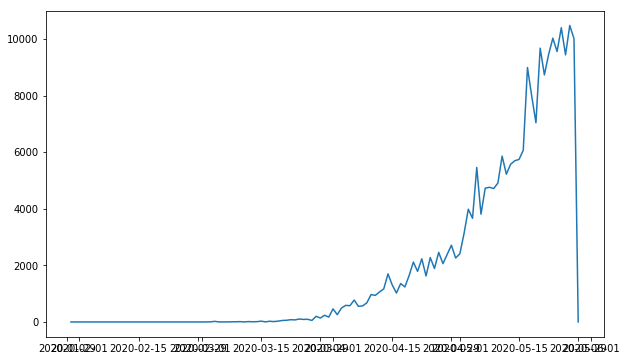

In [63]:
plt.figure(figsize=(10,6))
plt.plot(ts)

In [64]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

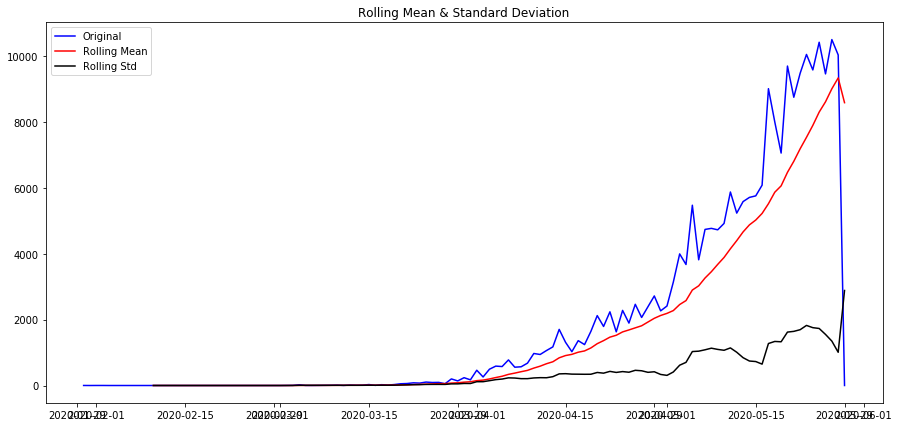

Results of Dickey-Fuller Test:
Test Statistic                   0.922874
p-value                          0.993382
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [65]:
test_stationarity(ts)

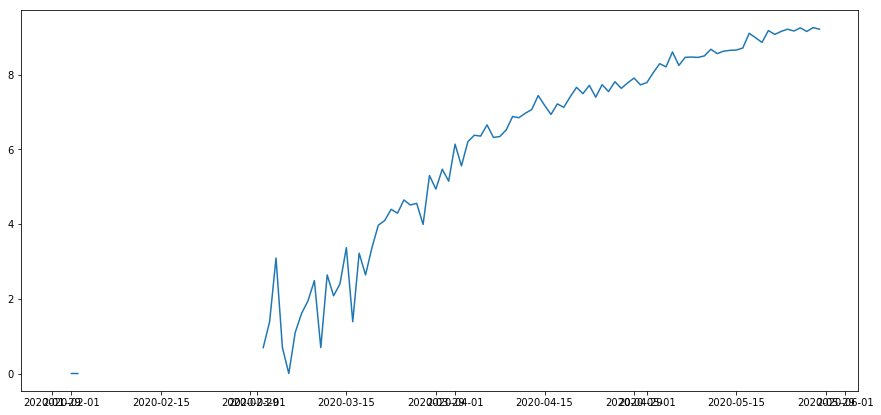

In [66]:
ts_log=np.log(ts)
plt.figure(figsize=(15,7))
plt.plot(ts_log)

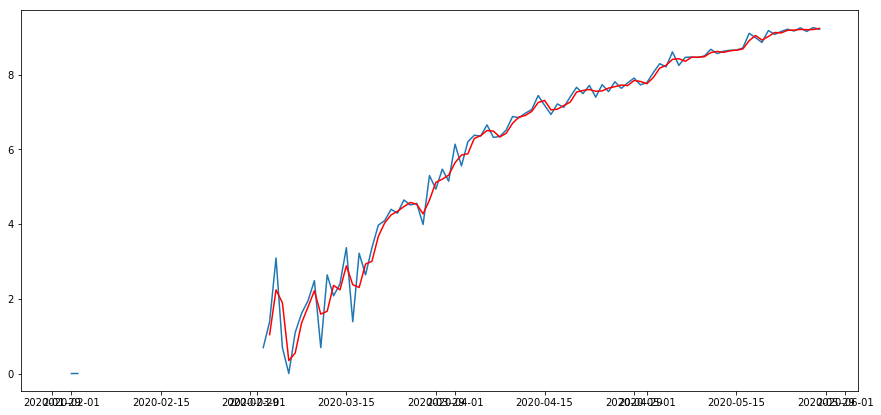

In [67]:
moving_avg = pd.Series(ts_log).rolling(window=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [68]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

2020-01-30    NaN
2020-01-31    NaN
2020-02-01    NaN
2020-02-02    0.0
2020-02-03    NaN
2020-02-04    NaN
2020-02-05    NaN
2020-02-06    NaN
2020-02-07    NaN
2020-02-08    NaN
Name: Daily Cases, dtype: float64

In [69]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

2020-02-02    0.000000
2020-03-03    0.346574
2020-03-04    0.852374
2020-03-05   -1.198948
2020-03-06   -0.346574
Name: Daily Cases, dtype: float64

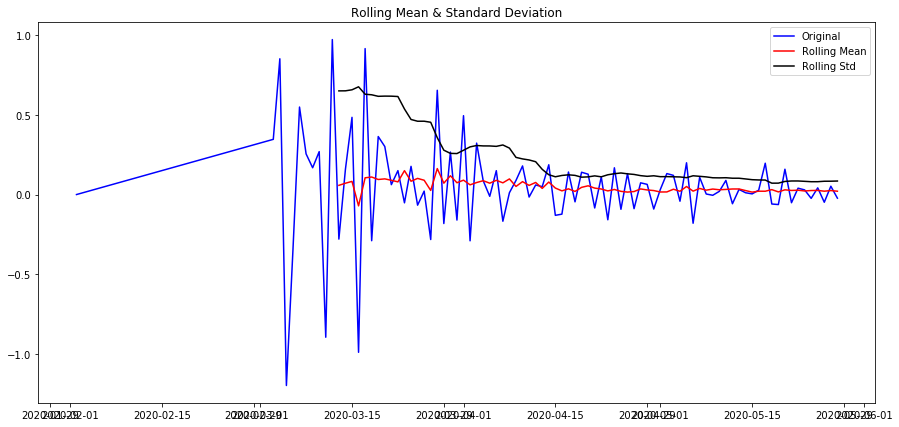

Results of Dickey-Fuller Test:
Test Statistic                 -1.462025
p-value                         0.552207
#Lags Used                     10.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [70]:
test_stationarity(ts_log_moving_avg_diff)

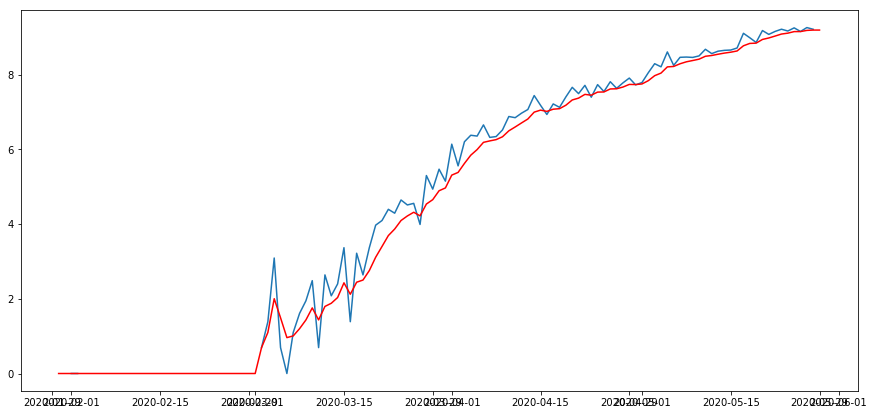

In [71]:
expwighted_avg = ts_log.ewm(halflife=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

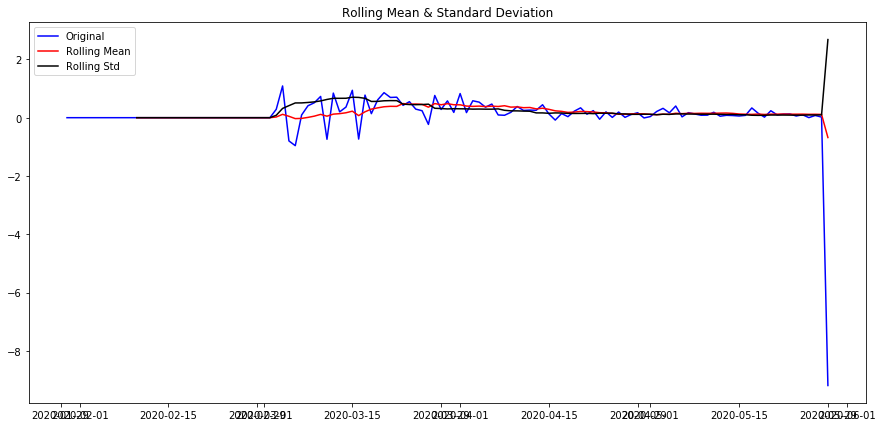

Results of Dickey-Fuller Test:
Test Statistic                  -3.023723
p-value                          0.032738
#Lags Used                       0.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64


In [72]:
from numpy import inf

ts_log[ts_log == -inf] = 0

ts_log_ewma_diff = ts_log - expwighted_avg



test_stationarity(ts_log_ewma_diff)

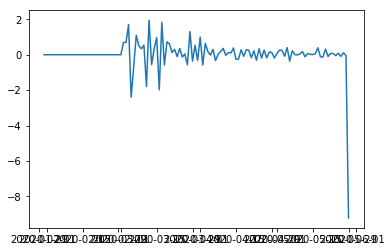

In [73]:
ts_log_diff = ts_log - ts_log.shift()

plt.plot(ts_log_diff)

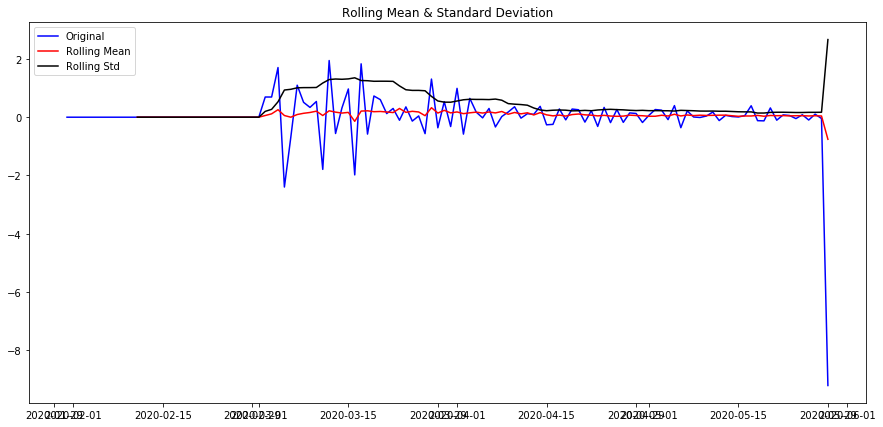

Results of Dickey-Fuller Test:
Test Statistic                -8.731176e+00
p-value                        3.188620e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


In [74]:
ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)

In [75]:
ts_log = pd.Series(ts_log)

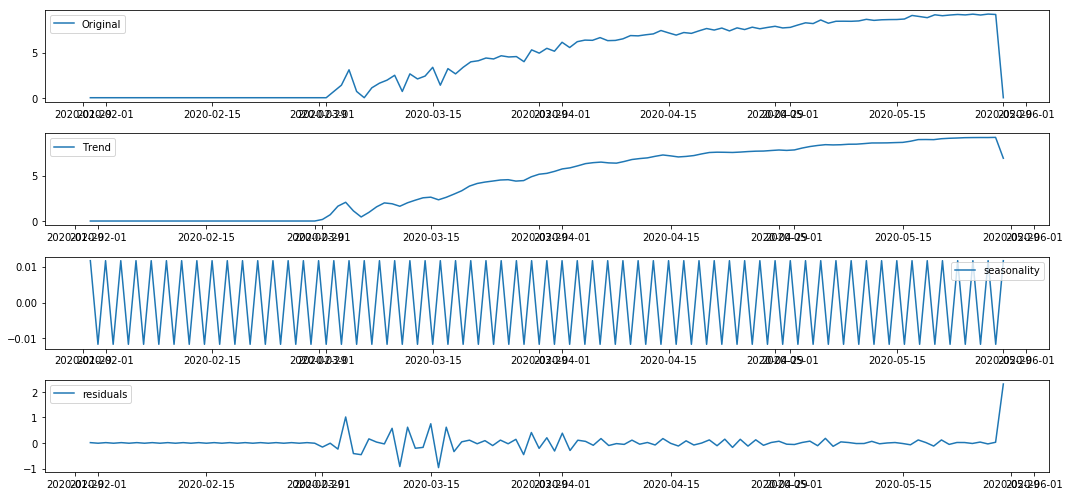

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

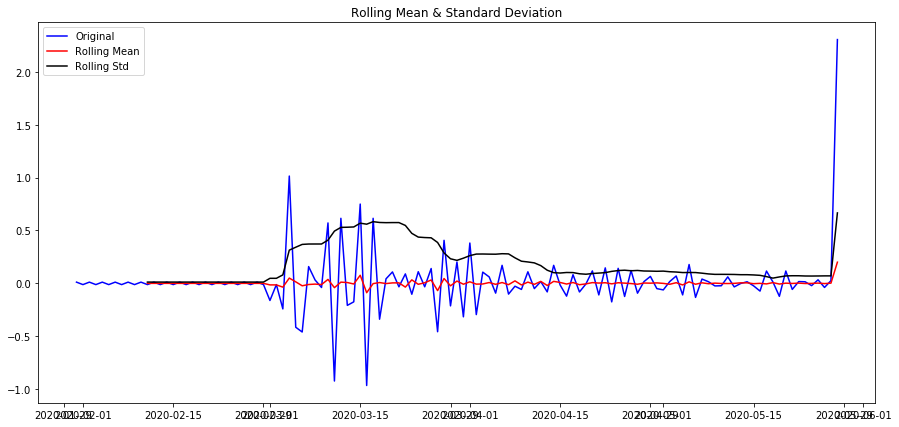

Results of Dickey-Fuller Test:
Test Statistic                -6.040720e+00
p-value                        1.348056e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


In [77]:
ts_log_decompose = residual #trend#residual needs to be used for modelling
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

In [78]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20,method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

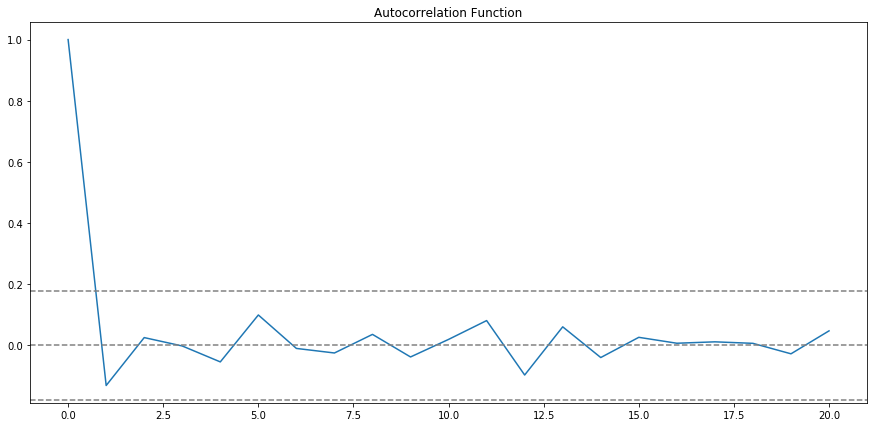

In [79]:
#plot ACF

plt.figure(figsize=(15,7))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')



Text(0.5, 1.0, 'Partial Autocorrelation Function')

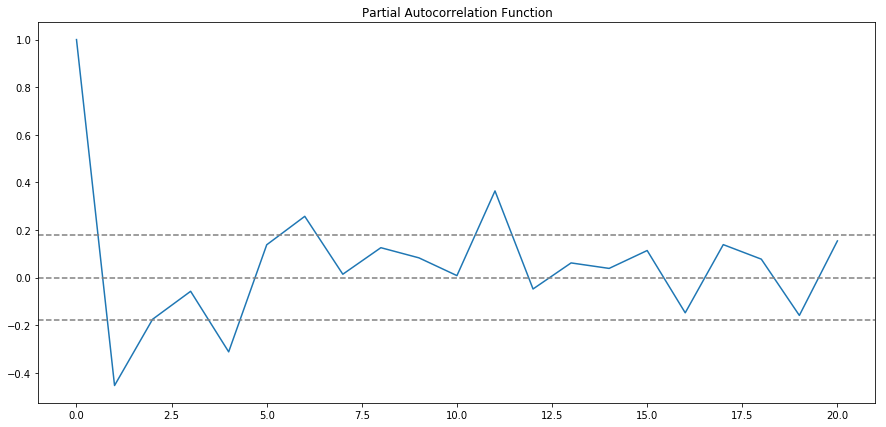

In [80]:
plt.figure(figsize=(15,7))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')

Optimization terminated successfully.
         Current function value: 1.271211
         Iterations: 49
         Function evaluations: 150
         Gradient evaluations: 150


Text(0.5, 1.0, 'RSS: nan')

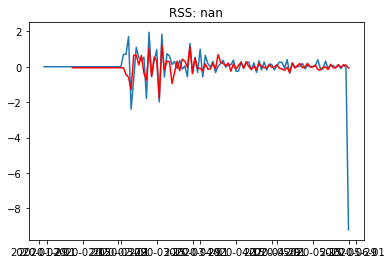

In [81]:
model = ARIMA(ts_log,order=(11,1,0))
results_AR = model.fit(method='css',solver='cg')
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Optimization terminated successfully.
         Current function value: 1.338974
         Iterations: 135
         Function evaluations: 144
         Gradient evaluations: 144


Text(0.5, 1.0, 'RSS: 102.2646')

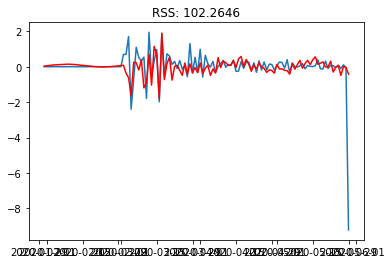

In [82]:
model = ARIMA(ts_log,order=(0,1,11))
results_MA = model.fit(method='css',solver='bfgs')
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [84]:
# model = ARIMA(ts_log,order=(6,1,6))
# results_ARIMA = model.fit()
# plt.plot(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues,color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [85]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy=True)
# print(predictions_ARIMA_diff)

In [86]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
# print(predictions_ARIMA_diff_cum_sum.head())

In [87]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
# predictions_ARIMA_log.head()

Text(0.5, 1.0, 'RMSE: 3524.6985')

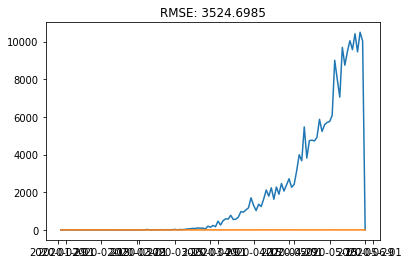

In [88]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [89]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Daily Cases   No. Observations:                  120
Model:                ARIMA(11, 1, 0)   Log Likelihood                -152.545
Method:                           css   S.D. of innovations              0.981
Date:                Fri, 29 May 2020   AIC                            331.091
Time:                        18:21:45   BIC                            366.078
Sample:                    02-11-2020   HQIC                           345.279
                         - 05-29-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2172      1.572     -0.138      0.890      -3.298       2.864
ar.L1.D.Daily Cases     -0.5499      0.216     -2.548      0.011      -0.973      -0.127
ar.L2.D.Daily Cases     -0.2326      0.257     -0.905      0.365      -0.736       0.271
ar.L3.D.Daily Cases     -0.1913      0.263     -0.728      0.467      -0.707       0.324
ar.L4.D.Daily Cases     -0.1288      0.270     -0.477      0.633      -0.658       0.401
ar.L5.D.Daily Cases      0.2755      0.277      0.995      0.320      -0.267       0.818
ar.L6.D.Daily Cases      0.2501      0.276      0.908      0.364      -0.290       0.790
ar.L7.D.Daily Cases      0.2201      0.275      0.800      0.424      -0.319       0.760
ar.L8.D.Daily Cases      0.2898      0.269      1.079      0.280      -0.236       0.816
ar.L9.D.Daily Cases      0.1900      0.261      0.727      0.467      -0.322       0.702
ar.L10.D.Daily Cases     0.2404      0.256      0.941      0.347      -0.260       0.741
ar.L11.D.Daily Cases     0.3639      0.215      1.689      0.091      -0.058       0.786
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0196           -0.0000j            1.0196           -0.0000
AR.2             0.8521           -0.7717j            1.1496           -0.1171
AR.3             0.8521           +0.7717j            1.1496            0.1171
AR.4             0.3666           -1.0071j            1.0718           -0.1944
AR.5             0.3666           +1.0071j            1.0718            0.1944
AR.6            -1.0733           -0.3054j            1.1159           -0.4559
AR.7            -1.0733           +0.3054j            1.1159            0.4559
AR.8            -0.7631           -0.7165j            1.0468           -0.3800
AR.9            -0.7631           +0.7165j            1.0468            0.3800
AR.10           -0.2223           -1.1187j            1.1406           -0.2812
AR.11           -0.2223           +1.1187j            1.1406            0.2812
------------------------------------------------------------------------------
"""

# Future Predictions

In [ ]:
sdate = date(2020, 5, 29)   # start date
edate = date(2020, 6, 29) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

dd =  pd.DataFrame(dd)

# via arima

In [ ]:
X = dd.values

forecast = results_AR.predict(start=sdate,
                                end=edate,)

# via Prophet

In [ ]:
from fbprophet import Prophet
confirmed = x
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95,daily_seasonality=True,
           seasonality_mode= 'multiplicative')
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
forecast_components = m.plot_components(forecast)

# Kindly Upvote and leave comments if you have any queries